# **Import Modules**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import re
from collections import Counter
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE

# **1. Read Files**

In [2]:
champ = pd.read_csv('Champions_Group_2025.csv')

# exclusion of overlooked columns
champ = champ.drop(['Parent Company', 'Parent Country'], axis=1)
champ

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Ownership Type,...,Company Status (Active/Inactive),Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Is Domestic Ultimate,Is Global Ultimate
0,1.238792,103.685898,LAKB2BID143135,ALLIED SPECIALTY COMPOUNDS PTE LTD,2821,"Plastics Materials, Synthetic Resins, and Nonv...",28210000,Plastics materials and resins,1980.0,Private,...,Active,NaN,300.0,300.0,76973100,76973100,NaN,2020-09-30T04:00:00Z,0,0
1,1.240392,103.837565,LAKB2BID8280323,CATALLA INVESTMENTS PTE LTD,6712,Offices of Bank Holding Companies,67120000,Bank holding companies,1993.0,Private,...,Active,NaN,100.0,100.0,9499251,9499251,NaN,NaN,0,0
2,1.240392,103.837565,LAKB2BID8357906,SQUARE TRADING SINGAPORE PTE. LTD.,6799,"Investors, Not Elsewhere Classified",67990102,Commodity contract trading companies,2018.0,Private,...,Active,4.0,22.0,22.0,13738494,13738494,Both Imports & Exports,2021-06-30T04:00:00Z,0,0
3,1.240409,103.837960,LAKB2BID8798827,HG METAL INVESTMENTS PTE. LTD.,6719,"Offices of Holding Companies, Not Elsewhere Cl...",67190000,"Holding companies, nec",2004.0,Private,...,Active,NaN,100.0,100.0,103745791,103745791,NaN,NaN,0,0
4,1.240784,103.839111,LAKB2BID1753792,UP-LEVEN INVESTMENT PTE LTD,6712,Offices of Bank Holding Companies,67120000,Bank holding companies,1986.0,Private,...,Active,NaN,33.0,33.0,60863682,60863682,Both Imports & Exports,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29177,NaN,NaN,LAKB2BID9439635,PEZZO SINGAPORE PTE. LTD.,5812,Eating Places,58120000,Eating places,2012.0,Private,...,Active,200.0,4.0,4.0,1026308,1026308,NaN,NaN,0,0
29178,NaN,NaN,LAKB2BID9466858,PRECIOUS SPARKS PTE. LTD.,4499,"Water Transportation Services, Not Elsewhere C...",44990000,"Water transportation services,",2010.0,Private,...,Active,21.0,98.0,394.0,28687426,255165711,NaN,NaN,0,0
29179,NaN,NaN,LAKB2BID9616359,CENTURY PLY (SINGAPORE) PTE. LTD.,7359,"Equipment Rental and Leasing, Not Elsewhere Cl...",73599900,"Equipment rental and leasing, nec",2014.0,Private,...,Active,14.0,14.0,6339.0,7314177,400433436,NaN,NaN,1,0
29180,NaN,NaN,LAKB2BID9652087,ASCENDAS INNOVATION PTE. LTD.,6719,"Offices of Holding Companies, Not Elsewhere Cl...",67190000,"Holding companies, nec",2016.0,Private,...,Active,10.0,80.0,80.0,13076800,13076800,NaN,NaN,0,0


## **1.1 Overview of Dataset**

In [3]:
champ.describe()

,LATITUDE,LONGITUDE,SIC Code,8-Digit SIC Code,Year Found,Square Footage,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Is Domestic Ultimate,Is Global Ultimate
count,29062.000000,29062.000000,29182.000000,2.918200e+04,28748.000000,0.0,16779.000000,29103.000000,2.640800e+04,2.918200e+04,2.918200e+04,29182.000000,29182.000000
mean,1.320677,103.843324,6169.271160,6.169092e+07,2004.505913,NaN,36.856189,139.764182,6.994665e+03,7.520992e+08,3.931771e+09,0.500069,0.257248
std,0.043740,0.053757,1705.845535,1.705778e+07,13.464238,NaN,173.334420,1118.939249,4.539462e+04,1.019636e+10,2.184589e+10,0.500009,0.437125
min,1.238792,103.611319,132.000000,1.320000e+06,1819.000000,NaN,1.000000,1.000000,1.000000e+00,-1.502631e+08,1.000000e+00,0.000000,0.000000
25%,1.284665,103.831874,5084.000000,5.084000e+07,1997.000000,NaN,10.000000,4.000000,4.000000e+00,1.026308e+06,1.026308e+06,0.000000,0.000000
50%,1.309701,103.848989,6719.000000,6.719000e+07,2008.000000,NaN,16.000000,16.000000,1.500000e+01,2.606644e+06,3.259582e+06,1.000000,0.000000
75%,1.337889,103.865922,7311.000000,7.311000e+07,2014.000000,NaN,29.000000,60.000000,1.000000e+02,2.176969e+07,1.482258e+08,1.000000,1.000000
max,1.469800,104.003218,9721.000000,9.721990e+07,2023.000000,NaN,12000.000000,80000.000000,2.190000e+06,3.184764e+11,5.140000e+11,1.000000,1.000000


In [4]:
champ.head()

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Ownership Type,...,Company Status (Active/Inactive),Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Is Domestic Ultimate,Is Global Ultimate
0,1.238792,103.685898,LAKB2BID143135,ALLIED SPECIALTY COMPOUNDS PTE LTD,2821,"Plastics Materials, Synthetic Resins, and Nonv...",28210000,Plastics materials and resins,1980.0,Private,...,Active,NaN,300.0,300.0,76973100,76973100,NaN,2020-09-30T04:00:00Z,0,0
1,1.240392,103.837565,LAKB2BID8280323,CATALLA INVESTMENTS PTE LTD,6712,Offices of Bank Holding Companies,67120000,Bank holding companies,1993.0,Private,...,Active,NaN,100.0,100.0,9499251,9499251,NaN,NaN,0,0
2,1.240392,103.837565,LAKB2BID8357906,SQUARE TRADING SINGAPORE PTE. LTD.,6799,"Investors, Not Elsewhere Classified",67990102,Commodity contract trading companies,2018.0,Private,...,Active,4.0,22.0,22.0,13738494,13738494,Both Imports & Exports,2021-06-30T04:00:00Z,0,0
3,1.240409,103.837960,LAKB2BID8798827,HG METAL INVESTMENTS PTE. LTD.,6719,"Offices of Holding Companies, Not Elsewhere Cl...",67190000,"Holding companies, nec",2004.0,Private,...,Active,NaN,100.0,100.0,103745791,103745791,NaN,NaN,0,0
4,1.240784,103.839111,LAKB2BID1753792,UP-LEVEN INVESTMENT PTE LTD,6712,Offices of Bank Holding Companies,67120000,Bank holding companies,1986.0,Private,...,Active,NaN,33.0,33.0,60863682,60863682,Both Imports & Exports,NaN,1,1


# **2. Data Cleaning**

## **2.1 Number of Missing Values in Each Column**

In [5]:
pd.DataFrame({
    "Missing Count": champ.isna().sum(),
    "Missing Percentage": (champ.isna().sum() / len(champ)) * 100
})

,Missing Count,Missing Percentage
LATITUDE,120,0.411212
LONGITUDE,120,0.411212
AccountID,0,0.000000
Company,0,0.000000
SIC Code,0,0.000000
Industry,0,0.000000
8-Digit SIC Code,0,0.000000
8-Digit SIC Description,0,0.000000
Year Found,434,1.487218
Ownership Type,0,0.000000


## **2.2 Dropping Columns with Excessive Number of Missing Values**

We will choose to omit the columns:
- `Square Footage` - Almost all the values are missing, it would be impossible to use it for training the model.
- `Import/Export Status` - 77.3% of the data in here are omitted, it would be very difficult to derive these missing values.
- `Fiscal Year End` - 76.9% of the data here are omitted. Furthermore, we would not forsee this variable to be able to accurately predict whether a company is a Global Ultimate or Domestic Ultimate.


In [6]:
champ = champ.drop(['Square Footage', 'Import/Export Status', 'Fiscal Year End'], axis=1)

## **2.3 Missing `LATITUDE` and `LONGITUDE` Data**

In [7]:
champ[champ["LATITUDE"].isna() | champ["LONGITUDE"].isna()]

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Ownership Type,Company Description,Company Status (Active/Inactive),Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Is Domestic Ultimate,Is Global Ultimate
29062,NaN,NaN,LAKB2BID1014519,IFASHION GROUP PTE. LTD.,8742,Management Consulting Services,87420000,Management consulting services,2014.0,Private,Ifashion Group Pte. Ltd. is primarily engaged ...,Active,NaN,5.0,5.0,384985,384985,1,1
29063,NaN,NaN,LAKB2BID1299895,SAMSUNG SDS GLOBAL SCL ASIA PACIFIC PTE. LTD.,4226,"Special Warehousing and Storage, Not Elsewhere...",42260000,"Special warehousing and storage, nec",2016.0,Private,Samsung Sds Global Scl Asia Pacific Pte. Ltd. ...,Active,37.0,37.0,NaN,10980923,12891593000,1,0
29064,NaN,NaN,LAKB2BID1300987,GROUP-IB GLOBAL PRIVATE LIMITED,7371,Computer Programming Services,73710302,Software programming applications,2019.0,Private,Group-Ib Global Private Limited is primarily e...,Active,NaN,27.0,27.0,6622000,6622000,1,1
29065,NaN,NaN,LAKB2BID1305548,AXXIS CONSULTING (S) PTE. LTD.,7371,Computer Programming Services,73710300,Computer software development and applications,2013.0,Private,Axxis Consulting (S) Pte. Ltd. is primarily en...,Active,40.0,40.0,8124.0,1761840,2521023466,1,0
29066,NaN,NaN,LAKB2BID1462879,ACW LOGISTICS PTE. LTD.,4225,General Warehousing and Storage,42250000,General warehousing and storage,1991.0,Private,Acw Logistics Pte. Ltd. is primarily engaged i...,Active,30.0,100.0,100.0,11065081,11065081,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29177,NaN,NaN,LAKB2BID9439635,PEZZO SINGAPORE PTE. LTD.,5812,Eating Places,58120000,Eating places,2012.0,Private,Pezzo Singapore Pte. Ltd. is primarily engaged...,Active,200.0,4.0,4.0,1026308,1026308,0,0
29178,NaN,NaN,LAKB2BID9466858,PRECIOUS SPARKS PTE. LTD.,4499,"Water Transportation Services, Not Elsewhere C...",44990000,"Water transportation services,",2010.0,Private,Precious Sparks Pte. Ltd. is primarily engaged...,Active,21.0,98.0,394.0,28687426,255165711,0,0
29179,NaN,NaN,LAKB2BID9616359,CENTURY PLY (SINGAPORE) PTE. LTD.,7359,"Equipment Rental and Leasing, Not Elsewhere Cl...",73599900,"Equipment rental and leasing, nec",2014.0,Private,Century Ply (Singapore) Pte. Ltd. is primarily...,Active,14.0,14.0,6339.0,7314177,400433436,1,0
29180,NaN,NaN,LAKB2BID9652087,ASCENDAS INNOVATION PTE. LTD.,6719,"Offices of Holding Companies, Not Elsewhere Cl...",67190000,"Holding companies, nec",2016.0,Private,Ascendas Innovation Pte. Ltd. is primarily eng...,Active,10.0,80.0,80.0,13076800,13076800,0,0


There are **120 missing values for both `LATITUDE` and `LONGITUDE`**. They happen to be from the same 120 companies and also the last 120 rows in the dataset. Potentially, we could fill in the missing coordinates through a Google search, however, it would not add much value considering that this missing coordinate data is only 0.411% of the entire dataset. Furthermore, a company like XENTIQ (PTE.) LTD has two locations that appear on Google Maps. It would be haphazard to incorrectly pick one of the locations. This is the case for other companies in the dataset.

Upon further inspection, we found that **ALL companies in the dataset are based in Singapore** (although the `Parent Country` may not necessarily be based in Singapore). In our feature engineering, we plan to split these coordinates by different regions in Singapore (e.g. North, Central). As such, we will choose to **drop the companies that have missing coordinate data.**

In [8]:
champ = champ.dropna(subset=["LATITUDE", "LONGITUDE"])

## **2.4 Missing Employee Data**

In [9]:
def categorize_missing(row):
    missing_types = []

    if pd.isna(row["Employees (Single Site)"]):
        missing_types.append("Single Site")
    if pd.isna(row["Employees (Domestic Ultimate Total)"]):
        missing_types.append("Domestic Ultimate")
    if pd.isna(row["Employees (Global Ultimate Total)"]):
        missing_types.append("Global Ultimate")

    return " + ".join(missing_types) if missing_types else "No Missing Values"

champ["Missing Combination"] = champ.apply(categorize_missing, axis=1)

# Count occurrences of each missing combination
missing_combinations = champ["Missing Combination"].value_counts().reset_index()
missing_combinations.columns = ["Missing Type Combination (Employees)", "Count"]
missing_combinations

,Missing Type Combination (Employees),Count
0,No Missing Values,14589
1,Single Site,11689
2,Global Ultimate,2043
3,Single Site + Global Ultimate,663
4,Domestic Ultimate + Global Ultimate,57
5,Domestic Ultimate,16
6,Single Site + Domestic Ultimate + Global Ultimate,3
7,Single Site + Domestic Ultimate,2


In [10]:
champ = champ.drop(['Missing Combination'], axis=1)

Most of the missing data appears to come from the `Employees (Single Site)` column. To estimate these missing values, we can take the **median employee count for each SIC code (industry)** and use it as a representative value for similar companies. It is logical that similar companies would have similar number of employees at one site.

First, we will use the **8-digit SIC code** to impute missing values, as it provides the most precise industry classification. If there are still missing values, we will fallback to the **4-digit SIC code**, which offers a broader industry grouping. Finally, if neither of these are available, we will use the **2-digit SIC code**, ensuring that every missing value is filled with the most relevant industry-specific median available.

In [11]:
champ["2-Digit SIC Code"] = champ["SIC Code"].astype(str).str[:2]

sic_8_median = champ.groupby("8-Digit SIC Code")["Employees (Single Site)"].median()
sic_4_median = champ.groupby("SIC Code")["Employees (Single Site)"].median()
sic_2_median = champ.groupby("2-Digit SIC Code")["Employees (Single Site)"].median()

def fill_single_site(row):
  if pd.isna(row["Employees (Single Site)"]):
    if row["8-Digit SIC Code"] in sic_8_median and not pd.isna(sic_8_median[row["8-Digit SIC Code"]]):
      return round(sic_8_median[row["8-Digit SIC Code"]])
    elif row["SIC Code"] in sic_4_median and not pd.isna(sic_4_median[row["SIC Code"]]):
      return round(sic_4_median[row["SIC Code"]])
    elif row["2-Digit SIC Code"] in sic_2_median and not pd.isna(sic_2_median[row["2-Digit SIC Code"]]):
      return round(sic_2_median[row["2-Digit SIC Code"]])
  return row["Employees (Single Site)"]

champ["Employees (Single Site)"] = champ.apply(fill_single_site, axis=1)

We will repeat this same method for `Employees (Domestic Ultimate Total)` and `Employees (Global Ultimate Total)`:

In [12]:
sic_8_median = champ.groupby("8-Digit SIC Code")["Employees (Domestic Ultimate Total)"].median()
sic_4_median = champ.groupby("SIC Code")["Employees (Domestic Ultimate Total)"].median()
sic_2_median = champ.groupby("2-Digit SIC Code")["Employees (Domestic Ultimate Total)"].median()

def fill_domestic_ultimate_total(row):
  if pd.isna(row["Employees (Domestic Ultimate Total)"]):
    if row["8-Digit SIC Code"] in sic_8_median and not pd.isna(sic_8_median[row["8-Digit SIC Code"]]):
      return round(sic_8_median[row["8-Digit SIC Code"]])
    elif row["SIC Code"] in sic_4_median and not pd.isna(sic_4_median[row["SIC Code"]]):
      return round(sic_4_median[row["SIC Code"]])
    elif row["2-Digit SIC Code"] in sic_2_median and not pd.isna(sic_2_median[row["2-Digit SIC Code"]]):
      return round(sic_2_median[row["2-Digit SIC Code"]])
  return row["Employees (Domestic Ultimate Total)"]

champ["Employees (Domestic Ultimate Total)"] = champ.apply(fill_domestic_ultimate_total, axis=1)

In [13]:
sic_8_median = champ.groupby("8-Digit SIC Code")["Employees (Global Ultimate Total)"].median()
sic_4_median = champ.groupby("SIC Code")["Employees (Global Ultimate Total)"].median()
sic_2_median = champ.groupby("2-Digit SIC Code")["Employees (Global Ultimate Total)"].median()

def fill_global_ultimate_total(row):
  if pd.isna(row["Employees (Global Ultimate Total)"]):
    if row["8-Digit SIC Code"] in sic_8_median and not pd.isna(sic_8_median[row["8-Digit SIC Code"]]):
      return round(sic_8_median[row["8-Digit SIC Code"]])
    elif row["SIC Code"] in sic_4_median and not pd.isna(sic_4_median[row["SIC Code"]]):
      return round(sic_4_median[row["SIC Code"]])
    elif row["2-Digit SIC Code"] in sic_2_median and not pd.isna(sic_2_median[row["2-Digit SIC Code"]]):
      return round(sic_2_median[row["2-Digit SIC Code"]])
  return row["Employees (Global Ultimate Total)"]

champ["Employees (Global Ultimate Total)"] = champ.apply(fill_global_ultimate_total, axis=1)

## **2.5 Missing `Year Found` Data**

Approximately **1.5% of the data for `Year Founded` is missing**, which is relatively negligible. Additionally, accurately estimating a company's founding year is challenging, as modern businesses can scale rapidly, achieving profitability and market dominance in a fraction of the time it took traditional firms. The fast-paced nature of today's industries makes historical trends less reliable for predicting when a company was established. As such, we will choose to **drop the companies that have missing `Year Found` data.**

In [14]:
champ = champ.dropna(subset=["Year Found"])

## **2.6 Remove Duplicated Rows**

In [15]:
print("\nNumber of duplicate rows:", champ.duplicated().sum())


Number of duplicate rows: 0


## **2.7 Outliers**

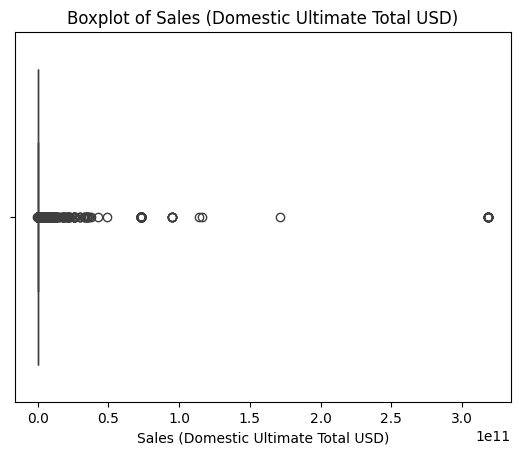

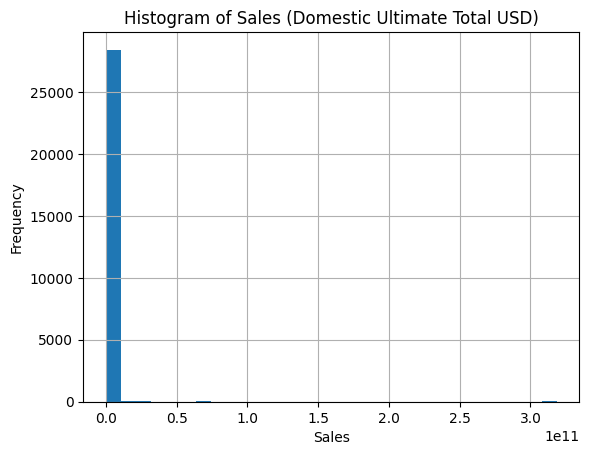

In [16]:
# Boxplot
sns.boxplot(x=champ['Sales (Domestic Ultimate Total USD)'])
plt.title('Boxplot of Sales (Domestic Ultimate Total USD)')
plt.show()

# Histogram
champ['Sales (Domestic Ultimate Total USD)'].hist(bins=30)
plt.title('Histogram of Sales (Domestic Ultimate Total USD)')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

Based on the boxplot and histogram, most of the data points of `Sales (Domestic Ultimate Total USD)` lie together. But there seem to be extreme outliers that have potential to cause noise in the prediction of the target variables.

We could use **models robust to outliers such as decision trees**. Also, for data with large outliers, we could utilise the **median** of these data points, thereby eliminating the impact of these outliers.

## **2.8 Data Types**

In [17]:
champ.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28632 entries, 0 to 29061
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LATITUDE                             28632 non-null  float64
 1   LONGITUDE                            28632 non-null  float64
 2   AccountID                            28632 non-null  object 
 3   Company                              28632 non-null  object 
 4   SIC Code                             28632 non-null  int64  
 5   Industry                             28632 non-null  object 
 6   8-Digit SIC Code                     28632 non-null  int64  
 7   8-Digit SIC Description              28632 non-null  object 
 8   Year Found                           28632 non-null  float64
 9   Ownership Type                       28632 non-null  object 
 10  Company Description                  28632 non-null  object 
 11  Company Status (Active/Inactive) 

`Year Found`, `Employees (Single Site)`, `Employees (Domestic Ultimate Total)` and `Employees (Global Ultimate Total)` should be int64 instead of float64.

In [18]:
champ["Year Found"] = champ["Year Found"].astype("int64")
champ["Employees (Single Site)"] = champ["Employees (Single Site)"].astype("int64")
champ["Employees (Domestic Ultimate Total)"] = champ["Employees (Domestic Ultimate Total)"].astype("int64")
champ["Employees (Global Ultimate Total)"] = champ["Employees (Global Ultimate Total)"].astype("int64")

# **3. Exploratory Data Analysis**

## **3.1 Company Types and Selection of Target Variable**

Add a column `Company Type` to indicate whether the company is a Global Ultimate, Domestic Ultimate or Neither (this is our target variable):

In [19]:
champ["Company Type"] = champ.apply(lambda row:
                                    "Domestic Ultimate" if row["Is Domestic Ultimate"] == 1 and row["Is Global Ultimate"] == 0
                                    else "Global Ultimate" if row["Is Global Ultimate"] == 1 and row["Is Domestic Ultimate"] == 1
                                    else "Neither", axis=1)

# Convert Company Type to numerical categories (Global Ultimate: 2; Domestic Ultimate: 1; Neither: 0)
champ["Company Type Code"] = champ["Company Type"].map({"Global Ultimate": 2, "Domestic Ultimate": 1, "Neither": 0})

Plot the frequency distribution of the 3 company types in a bar plot:

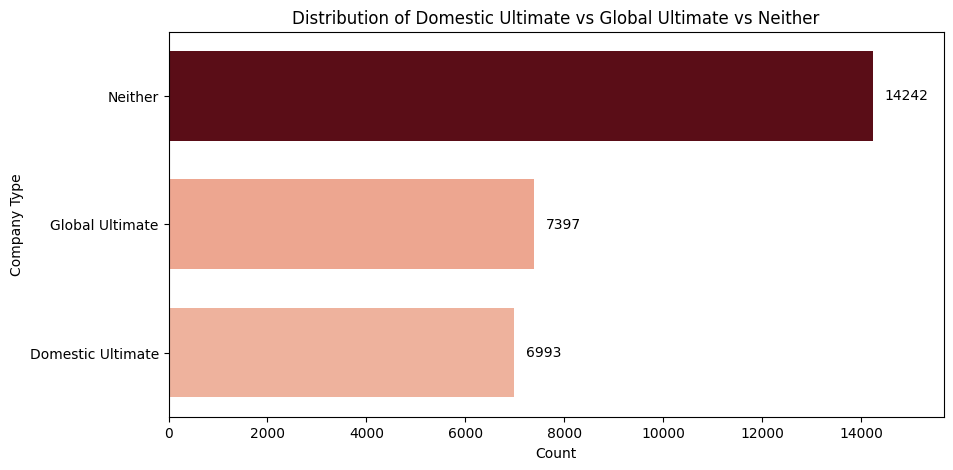

In [20]:
company_type_counts = champ["Company Type"].value_counts()

norm = mcolors.Normalize(vmin=company_type_counts.min(), vmax=company_type_counts.max())
colors = [cm.Reds(0.3 + 0.7 * norm(value)) for value in company_type_counts.values]

plt.figure(figsize=(10, 5))

ax = sns.barplot(y=company_type_counts.index, x=company_type_counts.values, palette=colors, width=0.7, hue=company_type_counts.index)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=8, fontsize=10)

plt.xlim(0, max(company_type_counts.values) * 1.1)
plt.title("Distribution of Domestic Ultimate vs Global Ultimate vs Neither", fontsize=12)
plt.xlabel("Count", fontsize=10)
plt.ylabel("Company Type", fontsize=10)
plt.show()

This shows that the dataset is highly balanced with equal number of Global Ultimate and Domestic Ultimate companies. There is no need for statistical methods such as Synthetic Minority Oversampling Technique (SMOTE).

## **3.2 Correlation Matrix**

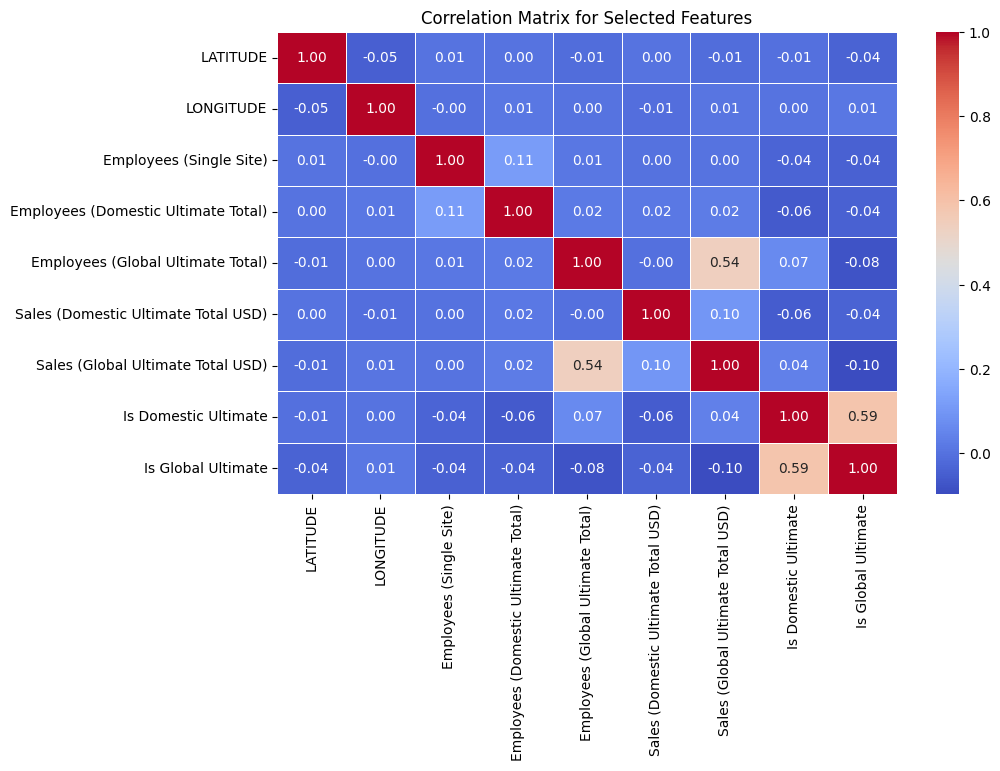

In [21]:
# Keeps only certain numeric features
champ_subset = champ[["LATITUDE", "LONGITUDE", "Employees (Single Site)", "Employees (Domestic Ultimate Total)",
       "Employees (Global Ultimate Total)", "Sales (Domestic Ultimate Total USD)", "Sales (Global Ultimate Total USD)",
       "Is Domestic Ultimate", "Is Global Ultimate"]]

correlation_matrix = champ_subset.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Selected Features')
plt.show()

## **3.3 Locations of Global Ultimates and Domestic Ultimates**

**Locations of Global Ultimates:**

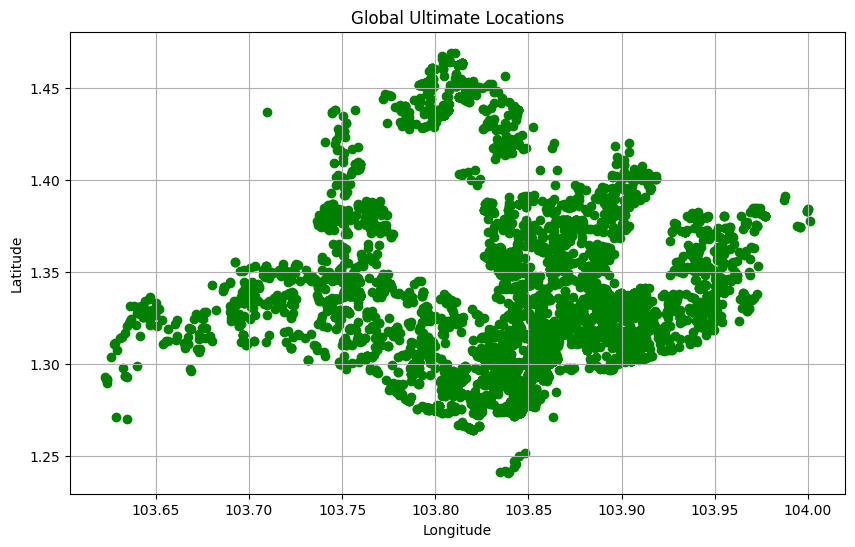

In [22]:
global_ultimates = champ[champ["Is Global Ultimate"] == 1]

plt.figure(figsize=(10, 6))
plt.scatter(global_ultimates["LONGITUDE"], global_ultimates["LATITUDE"], c="green", marker="o")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Global Ultimate Locations")
plt.grid(True)
plt.show()

**Location of Domestic Ultimates:**

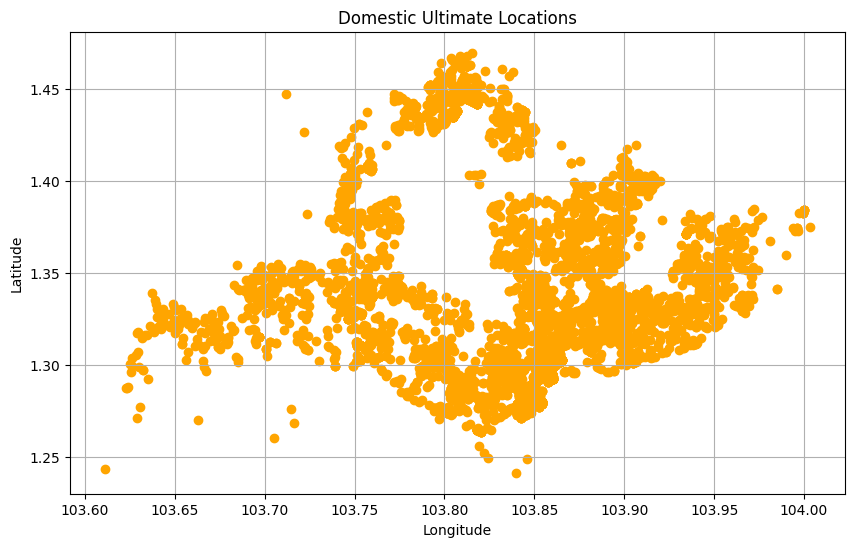

In [23]:
domestic_ultimates = champ[(champ["Is Global Ultimate"] == 0) & (champ["Is Domestic Ultimate"] == 1)]

plt.figure(figsize=(10, 6))
plt.scatter(domestic_ultimates["LONGITUDE"], domestic_ultimates["LATITUDE"], c="orange", marker="o")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Domestic Ultimate Locations")
plt.grid(True)
plt.show()

Based on the two maps plotted out, it seems that both global and domestic ultimate companies seem to be **located in the same regions (Central and East)**. It could also be the case that most business districts and offices are located in these places.

However, it could be a useful feature to **identify the cities (e.g. Bukit Timah)** that have the most number of Domestic Ultimates and Global Ultimates.

# **4. Feature Engineering and Selection**



## **4.1 Converting Coordinates into Regions of Singapore**

As mentioned, it is not useful to keep the absolute coordinates of the companies. However, it could be more useful to instead **retrieve the city (Bishan, Serangoon, etc.) and area (Central, North-East) that the company is located in**.

We managed to find a [dataset](https://www.kaggle.com/datasets/shymammoth/singapore-city-geo-coordinates-more-reliable?select=singapore_city_coordinates_improved.csv) that shows the latitude and longitude of each city and area in Singapore. Hence, we are able to find the **closest city and area that each company is located in**.

This feature could help us understand that perhaps companies in certain areas or cities are more likely to be domestic ultimate or global ultimates.


In [24]:
from scipy.spatial import KDTree

singapore = pd.read_csv('singapore_city_coordinates_improved.csv')
singapore = singapore.dropna(subset=['latitude', 'longitude'])
singapore = singapore.reset_index(drop=True)

champ_coords = np.radians(champ[['LATITUDE', 'LONGITUDE']].to_numpy())
singapore_coords = np.radians(singapore[['latitude', 'longitude']].to_numpy())

tree = KDTree(singapore_coords)

# Query closest points for each champ coordinate
distances, indices = tree.query(champ_coords)

champ['closest_city'] = singapore.loc[indices, 'City'].values
champ['closest_area'] = singapore.loc[indices, 'Area'].values

Now, let's see if there is a specific city with a larger number of Global or Domestic Ultimates. We can visualise this using a stacked bar plot:

<Figure size 1200x600 with 0 Axes>

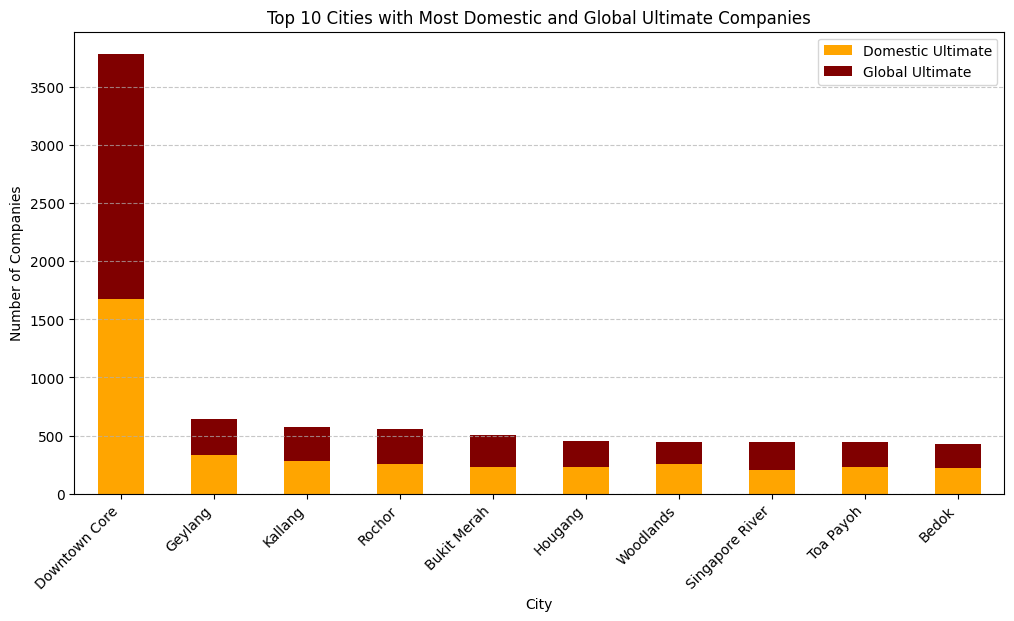

In [25]:
# Company Type Code = 1 (Domestic Ultimate); Company Type Code = 2 (Global Ultimate)
top_cities = champ[champ["Company Type Code"].isin([1, 2])].groupby(["closest_city", "Company Type Code"]).size().unstack(fill_value=0)

# Get the top 10 cities
top_cities["total"] = top_cities[1] + top_cities[2]
top_10_cities = top_cities.sort_values(by="total", ascending=False).head(10).drop(columns=["total"])

plt.figure(figsize=(12, 6))
top_10_cities.plot(kind="bar", stacked=True, figsize=(12, 6), color=["orange", "maroon"])

plt.xlabel("City")
plt.ylabel("Number of Companies")
plt.title("Top 10 Cities with Most Domestic and Global Ultimate Companies")
plt.xticks(rotation=45, ha="right")
plt.legend(["Domestic Ultimate", "Global Ultimate"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

If we include all the dataset (including the non-Domestic and non-Global Ultimates), will it still follow the same distribution?

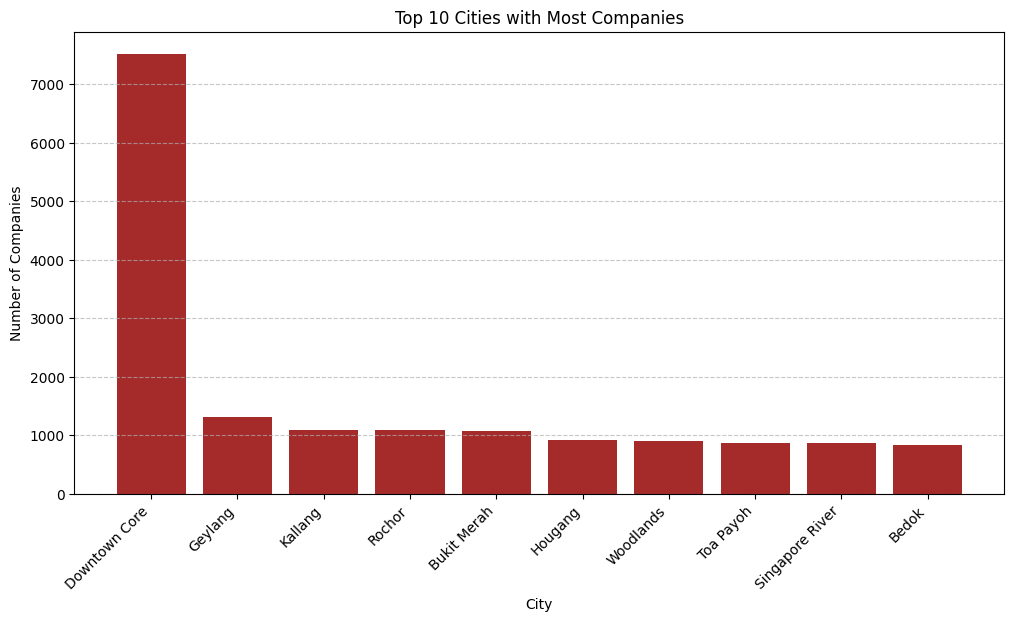

In [26]:
top_cities_all = champ.groupby("closest_city").size()

top_10_cities_all = top_cities_all.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_cities_all.index, top_10_cities_all.values, color="brown")

plt.xlabel("City")
plt.ylabel("Number of Companies")
plt.title("Top 10 Cities with Most Companies")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

The distribution remains largely the same, even when including all companies. This suggests that regional location alone is not the main determining factor for a company’s Global or Domestic Ultimate status. **Perhaps other features should hold greater weight when training the model.**

## **4.2 2-Digit SIC Codes**

In [27]:
print('Number of 4-digit SIC codes:', len(champ['SIC Code'].unique()))
print('Number of 8-digit SIC codes:', len(champ['8-Digit SIC Code'].unique()))

Number of 4-digit SIC codes: 582
Number of 8-digit SIC codes: 2233


Upon further inspection, there is a high degree of variation in the Standard Industrial Classification (SIC) codes for both the 4-digit and 8-digit ones. Specifically, the dataset contains **582 4-digit SIC codes** and **2,255 8-digit codes**.

Given this, it would be more practical to truncate SIC codes to their 2-digit *(as done in 1. Data Cleaning)* categories to prevent excessive variation from introducing unnecessary noise into the prediction of company type (global/domestic ultimate). The 4-digit and 8-digit SIC codes provide increasingly specific subcategories within industries, which could lead to overfitting and a loss of generalisability in the model. By using only the 2-digit SIC codes, we retain essential industry classification information while reducing complexity, making it easier for the model to learn meaningful patterns.

In [28]:
print('Number of 2-digit SIC codes:', len(champ["2-Digit SIC Code"].unique()))

Number of 2-digit SIC codes: 75


There are only **75 unique 2-digit SIC codes**. This is now a more manageable feature for modeling and to subset the data later on.

In [29]:
def map_sic_to_industry(sic_code):
    if 1000 <= sic_code <= 1499:
        return "Mining"
    elif 1500 <= sic_code <= 1799:
        return "Construction"
    elif 2000 <= sic_code <= 3999:
        return "Manufacturing"
    elif 4000 <= sic_code <= 4999:
        return "Transportation, Communications, Electric, Gas, and Sanitary Services"
    elif 5000 <= sic_code <= 5199:
        return "Wholesale Trade"
    elif 5200 <= sic_code <= 5999:
        return "Retail Trade"
    elif 6000 <= sic_code <= 6799:
        return "Finance, Insurance, and Real Estate"
    elif 7000 <= sic_code <= 8999:
        return "Services"
    elif 9100 <= sic_code <= 9729:
        return "Public Administration"
    else:
        return "Other"

champ['Industry Group'] = champ['SIC Code'].apply(map_sic_to_industry)

champ.head()

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Ownership Type,...,Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Is Domestic Ultimate,Is Global Ultimate,2-Digit SIC Code,Company Type,Company Type Code,closest_city,closest_area,Industry Group
0,1.238792,103.685898,LAKB2BID143135,ALLIED SPECIALTY COMPOUNDS PTE LTD,2821,"Plastics Materials, Synthetic Resins, and Nonv...",28210000,Plastics materials and resins,1980,Private,...,76973100,76973100,0,0,28,Neither,0,Bukit Merah,central,Manufacturing
1,1.240392,103.837565,LAKB2BID8280323,CATALLA INVESTMENTS PTE LTD,6712,Offices of Bank Holding Companies,67120000,Bank holding companies,1993,Private,...,9499251,9499251,0,0,67,Neither,0,Southern Islands,central,"Finance, Insurance, and Real Estate"
2,1.240392,103.837565,LAKB2BID8357906,SQUARE TRADING SINGAPORE PTE. LTD.,6799,"Investors, Not Elsewhere Classified",67990102,Commodity contract trading companies,2018,Private,...,13738494,13738494,0,0,67,Neither,0,Southern Islands,central,"Finance, Insurance, and Real Estate"
3,1.240409,103.837960,LAKB2BID8798827,HG METAL INVESTMENTS PTE. LTD.,6719,"Offices of Holding Companies, Not Elsewhere Cl...",67190000,"Holding companies, nec",2004,Private,...,103745791,103745791,0,0,67,Neither,0,Southern Islands,central,"Finance, Insurance, and Real Estate"
4,1.240784,103.839111,LAKB2BID1753792,UP-LEVEN INVESTMENT PTE LTD,6712,Offices of Bank Holding Companies,67120000,Bank holding companies,1986,Private,...,60863682,60863682,1,1,67,Global Ultimate,2,Southern Islands,central,"Finance, Insurance, and Real Estate"


By assigning an Industry group based on the SIC code, we can more effectively categorise the companies based on their Industry Groups. By doing so, we can determine the relationship between Industry groups and the nature of the company (whether it is Global/ Domestic).


## **4.3 Keywords of Domestic Ultimates and Global Ultimates in Company Descriptions**

Perhaps there may be certain words in a company's description that may signifiy that these companies have global or domestic presence.

In [30]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\W+', ' ', text)
    words = text.split()
    return words

global_descriptions = champ[champ["Company Type Code"] == 2]["Company Description"].dropna().apply(clean_text)
domestic_descriptions = champ[champ["Company Type Code"] == 1]["Company Description"].dropna().apply(clean_text)
all_descriptions = champ["Company Description"].dropna().apply(clean_text)

global_words = [word for sublist in global_descriptions for word in sublist]
domestic_words = [word for sublist in domestic_descriptions for word in sublist]
all_words = [word for sublist in all_descriptions for word in sublist]

global_word_counts = Counter(global_words)
domestic_word_counts = Counter(domestic_words)
all_word_counts = Counter(all_words)

global_word_df = pd.DataFrame(global_word_counts.items(), columns=["word", "count_global"])
domestic_word_df = pd.DataFrame(domestic_word_counts.items(), columns=["word", "count_domestic"])
all_word_df = pd.DataFrame(all_word_counts.items(), columns=["word", "count_all"])

# Merge all three dataframes on the "word" column using an outer join
merged_word_df = global_word_df.merge(domestic_word_df, on="word", how="outer").merge(all_word_df, on="word", how="outer")
merged_word_df.fillna(0, inplace=True)

merged_word_df[["count_global", "count_domestic", "count_all"]] = merged_word_df[["count_global", "count_domestic", "count_all"]].astype(int)

merged_word_df = merged_word_df.sort_values(by="count_all", ascending=False)
merged_word_df["domestic_ratio"] = merged_word_df["count_domestic"] / merged_word_df["count_all"]
merged_word_df["global_ratio"] = merged_word_df["count_global"] / merged_word_df["count_all"]

top_domestic_ratio = merged_word_df[merged_word_df["domestic_ratio"] > 0.4].drop(['count_global','global_ratio'], axis=1)
top_global_ratio = merged_word_df[merged_word_df["global_ratio"] > 0.4].drop(['count_domestic','domestic_ratio'], axis=1)

print("Top Domestic Ratios")
print(top_domestic_ratio.head(20))
print("Top Global Ratios")
print(top_global_ratio.head(20))

Top Domestic Ratios
                 word  count_domestic  count_all  domestic_ratio
6618        equipment            2470       5049        0.489206
5695     distribution            2225       4996        0.445356
21623       wholesale            2163       4667        0.463467
18125       singapore            2583       4480        0.576562
1717             asia            1292       2320        0.556897
4438   communications             616       1147        0.537053
9970      instruments             465       1121        0.414808
15108       petroleum             525       1073        0.489282
6307       electronic             572       1048        0.545802
12186       machinery             440       1018        0.432220
19175        supplies             426        970        0.439175
14858           parts             414        911        0.454446
14683         pacific             510        865        0.589595
19712       telephone             339        745        0.455034
3884 

For Domestic Ultimates, the words that seem to indicate a domestic presence are words like **equipment, distribution, wholesale, singapore and asia.** It seems that everyday industries such as the telecomm industry seem to have greater domestic presence. Companies who have domestic presence also boast about their presence in Singapore and Asia.

For Global Ultimates, the words that seem to indicate a global presence are words like **securities, companies, holding, owning, banks, exercising, sole, holdings and custom.** It is likely that companies who hold the assets/securities of other companies are more likely to have greater investing power and hence a greater global presence.

## **4.4 Difference in Employees (Domestic Ultimate) and Employees (Global Ultimate)**

Hypothesis 1: Based on eyeballing of the data, we saw that companies that were **Global Ultimates tend to lump the number of global and domestic employees together (i.e. they were equal)**.

Hypothesis 2: Logically, it makes sense that **Domestic Ultimates were more likely to have greater number of domestic employees than global employees.**

In [31]:
champ["employee_difference"] = champ["Employees (Global Ultimate Total)"] - champ["Employees (Domestic Ultimate Total)"]

global_ultimates = champ[champ["Company Type Code"] == 2]
domestic_ultimates = champ[champ["Company Type Code"] == 1]

global_counts = {
    "Negative (More Domestic Employees)": (global_ultimates["employee_difference"] < 0).sum(),
    "Positive (More Global Employees)": (global_ultimates["employee_difference"] > 0).sum(),
    "Zero (Equal Domestic and Global Employees)": (global_ultimates["employee_difference"] == 0).sum()
}

domestic_counts = {
    "Negative (More Domestic Employees)": (domestic_ultimates["employee_difference"] < 0).sum(),
    "Positive (More Global Employees)": (domestic_ultimates["employee_difference"] > 0).sum(),
    "Zero (Equal Domestic and Global Employees)": (domestic_ultimates["employee_difference"] == 0).sum()
}

global_counts_df = pd.DataFrame(global_counts.items(), columns=["Category", "Count"])
domestic_counts_df = pd.DataFrame(domestic_counts.items(), columns=["Category", "Count"])

print("Global Ultimate Employee Difference")
print(global_counts_df)
print("\nDomestic Ultimate Employee Difference")
print(domestic_counts_df)

Global Ultimate Employee Difference
                                     Category  Count
0          Negative (More Domestic Employees)    100
1            Positive (More Global Employees)    142
2  Zero (Equal Domestic and Global Employees)   7155

Domestic Ultimate Employee Difference
                                     Category  Count
0          Negative (More Domestic Employees)   2097
1            Positive (More Global Employees)   4791
2  Zero (Equal Domestic and Global Employees)    105


Based on the above generated table, it seems that there is **greater evidence to support Hypothesis 1 (Global Ultimates had an equal number of domestic and global employees)** but not much to support Hypothesis 2 (Domestic Ultimates would have more domestic employees than global employees).

**Employee difference (between Domestic and Global Ultimates)** could be a feature useful to predict that a company is likely a Global Ultimate if it was closer to 0.

## **4.5 Difference in Sales (Domestic Ultimate) and Sales (Global Ultimate)**

Similarly, we fashioned our sales hypothesis as follows:

Hypothesis 1: Based on eyeballing of the data, we saw that companies that were **Global Ultimates tend to lump the global and domestic sales together (i.e. they were equal)**.

Hypothesis 2: Logically, it also makes sense that **Domestic Ultimates were more likely to have greater amount of domestic sales than global sales.**

In [32]:
champ["sales_difference"] = champ["Sales (Global Ultimate Total USD)"] - champ["Sales (Domestic Ultimate Total USD)"]

global_ultimates = champ[champ["Company Type Code"] == 2]
domestic_ultimates = champ[champ["Company Type Code"] == 1]

global_counts = {
    "Negative (More Domestic Sales)": (global_ultimates["sales_difference"] < 0).sum(),
    "Positive (More Global Sales)": (global_ultimates["sales_difference"] > 0).sum(),
    "Zero (Equal Domestic and Global Sales)": (global_ultimates["sales_difference"] == 0).sum()
}

domestic_counts = {
    "Negative (More Domestic Sales)": (domestic_ultimates["sales_difference"] < 0).sum(),
    "Positive (More Global Sales)": (domestic_ultimates["sales_difference"] > 0).sum(),
    "Zero (Equal Domestic and Global Sales)": (domestic_ultimates["sales_difference"] == 0).sum()
}

global_counts_df = pd.DataFrame(global_counts.items(), columns=["Category", "Count"])
domestic_counts_df = pd.DataFrame(domestic_counts.items(), columns=["Category", "Count"])

print("Global Ultimate Sales Difference")
print(global_counts_df)
print("\nDomestic Ultimate Sales Difference")
print(domestic_counts_df)

Global Ultimate Sales Difference
                                 Category  Count
0          Negative (More Domestic Sales)     75
1            Positive (More Global Sales)    157
2  Zero (Equal Domestic and Global Sales)   7165

Domestic Ultimate Sales Difference
                                 Category  Count
0          Negative (More Domestic Sales)   1763
1            Positive (More Global Sales)   5205
2  Zero (Equal Domestic and Global Sales)     25


Based on the above generated table, it seems that there is **greater evidence to support Hypothesis 1 (Global Ultimates had an equal number of domestic and global sales)** but not much to support Hypothesis 2 (Domestic Ultimates would have more domestic sales than global sales).

**Sales difference (between Domestic and Global Ultimates)** could be a feature useful to predict that a company is likely a Global Ultimate if it was closer to 0.

To avoid overfitting the model, we will stick to using **only Employee Differences** as a feature as the underlying reasons for the differences in the two features are similar.

## **4.6 Age of the Company**

We will also utilise the `Year Found` of companies to **derive the age of the company.** Older companies are more likely to have economies of scale and reputation with customers and suppliers, thus a likely predictor of whether a company is a Domestic Ultimate or Global Ultimate.

In [33]:
champ["Company Age"] = 2025 - champ['Year Found']

## **4.7 Summary of Features to Predict Target Outcome**

These are the features we plan to use in our model to predict our target outcome `Is Domestic Ultimate` and `Is Global Ultimate`:
- 2-digit SIC codes
- Keywords of Domestic Ultimates
- Keywords of Global Ultimates
- Regions of Singapore
- Difference in employees
- Company age

# **5. Data Preprocessing**

## **5.1 Encoding Categorical Data**

**Encoding Domestic Ultimate and Global Ultimate keywords:**

In [34]:
champ_encoded = champ

In [35]:
domestic_keywords = ["equipment", "distribution", "wholesale", "singapore", "asia"]

global_keywords = ["securities", "companies", "holding", "owning", "banks", "exercising", "sole",
                   "holdings", "custom"]

for keyword in domestic_keywords:
    champ_encoded[f"has_domestic_keyword_{keyword}"] = champ_encoded["Company Description"].str.contains(keyword, case=False, na=False).astype(int)

for keyword in global_keywords:
    champ_encoded[f"has_global_keyword_{keyword}"] = champ_encoded["Company Description"].str.contains(keyword, case=False, na=False).astype(int)

**Dummy coding regions of Singapore:**

In [36]:
champ_encoded = pd.get_dummies(champ_encoded, columns=["closest_area"], drop_first=True)

## **5.2 Feature Scaling - Normalisation**

In [37]:
features = ["2-Digit SIC Code","employee_difference", "Company Age"]
domestic_keyword_features = [col for col in champ_encoded.columns if col.startswith("has_domestic_keyword_")]
global_keyword_features = [col for col in champ_encoded.columns if col.startswith("has_global_keyword_")]
region_features = [col for col in champ_encoded.columns if col.startswith("closest_area")]
features += domestic_keyword_features + global_keyword_features + region_features

scaler = MinMaxScaler()

X = champ_encoded[features]
X_scaled = scaler.fit_transform(X)
y = champ_encoded['Company Type Code']
print("Features of model:")
print(X.info())

Features of model:
<class 'pandas.core.frame.DataFrame'>
Index: 28632 entries, 0 to 29061
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   2-Digit SIC Code                   28632 non-null  object
 1   employee_difference                28632 non-null  int64 
 2   Company Age                        28632 non-null  int64 
 3   has_domestic_keyword_equipment     28632 non-null  int64 
 4   has_domestic_keyword_distribution  28632 non-null  int64 
 5   has_domestic_keyword_wholesale     28632 non-null  int64 
 6   has_domestic_keyword_singapore     28632 non-null  int64 
 7   has_domestic_keyword_asia          28632 non-null  int64 
 8   has_global_keyword_securities      28632 non-null  int64 
 9   has_global_keyword_companies       28632 non-null  int64 
 10  has_global_keyword_holding         28632 non-null  int64 
 11  has_global_keyword_owning          28632 non-null  in

## **5.3 Train-Test-Validation Split (80-10-10)**

In [38]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

## **5.4 Potential of Imbalanced Dataset**

In [39]:
def calculate_percentage_distribution(y):
    class_counts = y.value_counts()
    class_percentage = (class_counts / len(y)) * 100
    return pd.DataFrame({'Count': class_counts, 'Percentage': class_percentage.round(2)})

print("\nBefore SMOTE - Training set:")
print(calculate_percentage_distribution(y_train))

print("\nBefore SMOTE - Test set:")
print(calculate_percentage_distribution(y_test))

print("\nBefore SMOTE - Validation set:")
print(calculate_percentage_distribution(y_val))


Before SMOTE - Training set:
                   Count  Percentage
Company Type Code                   
0                  11393       49.74
2                   5918       25.84
1                   5594       24.42

Before SMOTE - Test set:
                   Count  Percentage
Company Type Code                   
0                   1425       49.76
2                    740       25.84
1                    699       24.41

Before SMOTE - Validation set:
                   Count  Percentage
Company Type Code                   
0                   1424       49.74
2                    739       25.81
1                    700       24.45


**Apply SMOTE to training set:**


After SMOTE - Training set:
                   Count  Percentage
Company Type Code                   
0                  11393       33.33
2                  11393       33.33
1                  11393       33.33


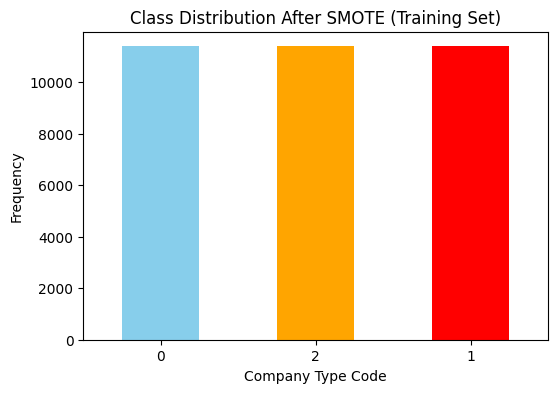

In [40]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE - Training set:")
print(calculate_percentage_distribution(y_train_resampled))

# Visualise class distribution
plt.figure(figsize=(6, 4))
calculate_percentage_distribution(y_train_resampled)['Count'].plot(kind='bar', color=['skyblue', 'orange', 'red'])
plt.title('Class Distribution After SMOTE (Training Set)')
plt.xlabel('Company Type Code')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# **6. Model Training & Individual Results**
This is a classifier problem, so we will use the following ML models:
- Decision Tree
- Random Forest
- XGBoost
- K-Nearest Neighbors

In [41]:
def generate_results(y_test, y_pred, model, X_train, y_train):
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    num_classes = cm.shape[0]
    
    class_labels_pred = [f'Predicted {i}' for i in range(num_classes)]
    class_labels_true = [f'Actual {i}' for i in range(num_classes)]
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels_pred, yticklabels=class_labels_true)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    # Cross-validation accuracy
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}")

    # Check for overfitting
    train_acc = model.score(X_train, y_train)
    print(f"Training Accuracy: {train_acc:.4f}")

## **6.1 Decision Tree**

### **Decision Tree Model (Before SMOTE)**

**Training Using the Training Set**

In [42]:
tree_model = DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree_model = tree_model.predict(X_test)

**Tune Hyperparameters on the Validation Set**

In [43]:
best_depth = None
best_acc = 0

for depth in range(2, 10):
    tree_model = DecisionTreeClassifier(class_weight='balanced', max_depth=depth, random_state=42)
    tree_model.fit(X_train, y_train)
    
    y_val_pred = tree_model.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    
    print(f"Max Depth: {depth} | Validation Accuracy: {val_acc:.4f}")

    if val_acc > best_acc:
        best_acc = val_acc
        best_depth = depth

best_tree_model = DecisionTreeClassifier(class_weight='balanced', max_depth=best_depth, random_state=42)
best_tree_model.fit(X_train, y_train)

Max Depth: 2 | Validation Accuracy: 0.4911
Max Depth: 3 | Validation Accuracy: 0.6699
Max Depth: 4 | Validation Accuracy: 0.6741
Max Depth: 5 | Validation Accuracy: 0.6724
Max Depth: 6 | Validation Accuracy: 0.6937
Max Depth: 7 | Validation Accuracy: 0.6951
Max Depth: 8 | Validation Accuracy: 0.6975
Max Depth: 9 | Validation Accuracy: 0.6993


DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=42)

**Results from the Test Set**

Accuracy: 0.7018156424581006
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.64      0.69      1425
           1       0.75      0.95      0.84       699
           2       0.57      0.59      0.58       740

    accuracy                           0.70      2864
   macro avg       0.69      0.73      0.70      2864
weighted avg       0.70      0.70      0.70      2864



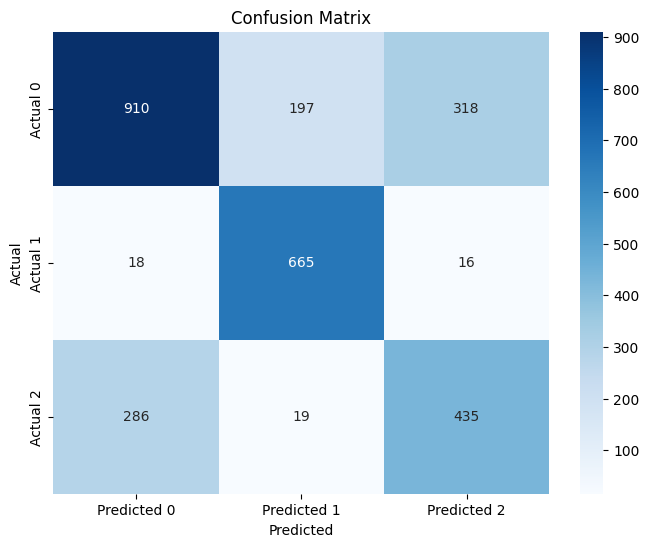

Cross-Validation Accuracy: 0.6916
Training Accuracy: 0.7198


In [44]:
y_pred = best_tree_model.predict(X_test)
generate_results(y_test, y_pred, best_tree_model, X_train, y_train)

### **Decision Tree Model (After SMOTE)**

**Training Using the Training Set**

In [45]:
tree_model = DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=42)
tree_model.fit(X_train_resampled, y_train_resampled)
y_pred_tree_model = tree_model.predict(X_test)

**Tune Hyperparameters on the Validation Set**

In [46]:
best_depth = None
best_acc = 0

for depth in range(2, 10):
    tree_model = DecisionTreeClassifier(class_weight='balanced', max_depth=depth, random_state=42)
    tree_model.fit(X_train_resampled, y_train_resampled)
    
    y_val_pred = tree_model.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    
    print(f"Max Depth: {depth} | Validation Accuracy: {val_acc:.4f}")

    if val_acc > best_acc:
        best_acc = val_acc
        best_depth = depth

best_tree_model = DecisionTreeClassifier(class_weight='balanced', max_depth=best_depth, random_state=42)
best_tree_model.fit(X_train_resampled, y_train_resampled)

Max Depth: 2 | Validation Accuracy: 0.4911
Max Depth: 3 | Validation Accuracy: 0.6699
Max Depth: 4 | Validation Accuracy: 0.6769
Max Depth: 5 | Validation Accuracy: 0.6727
Max Depth: 6 | Validation Accuracy: 0.6895
Max Depth: 7 | Validation Accuracy: 0.6972
Max Depth: 8 | Validation Accuracy: 0.7031
Max Depth: 9 | Validation Accuracy: 0.6982


DecisionTreeClassifier(class_weight='balanced', max_depth=8, random_state=42)

**Results from the Test Set**

Accuracy: 0.7087988826815642
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.67      0.70      1425
           1       0.77      0.95      0.85       699
           2       0.58      0.55      0.56       740

    accuracy                           0.71      2864
   macro avg       0.70      0.72      0.71      2864
weighted avg       0.70      0.71      0.70      2864



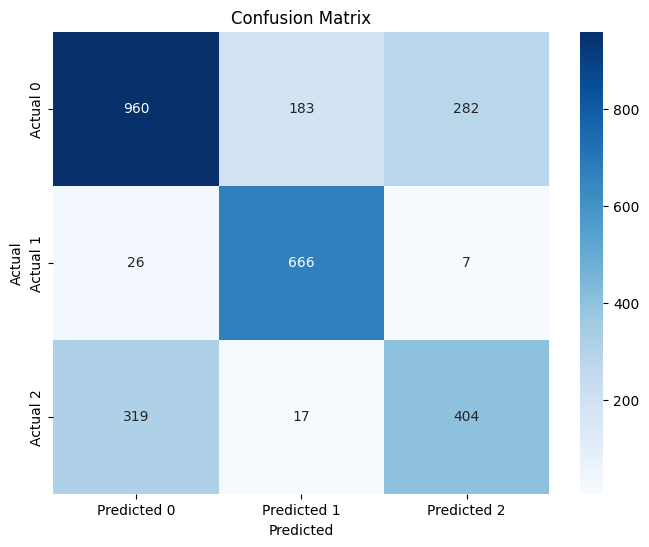

Cross-Validation Accuracy: 0.7235
Training Accuracy: 0.7392


In [47]:
y_pred = best_tree_model.predict(X_test)
generate_results(y_test, y_pred, best_tree_model, X_train_resampled, y_train_resampled)

It seems that the Decision Tree model that utilises the resampled training set (after applying SMOTE), gives similar results. Hence, for the machine learning models in the below parts, we will not utilise the resampled training set.

## **6.2 Random Forest**

**Training Using the Training Set**

In [48]:
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

**Tune Hyperparameters on the Training Set**

In [49]:
# You may choose to run the randomised search to verify the parameters, but it will take a bit of time (change RUN_TUNING to True)
RUN_TUNING = False

if RUN_TUNING:
    param_dist = {
        'n_estimators': np.arange(100, 500, 50),
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    random_search = RandomizedSearchCV(
        rf_model, param_distributions=param_dist, 
        n_iter=20, cv=5, scoring='accuracy', random_state=42, n_jobs=-1
    )
    random_search.fit(X_train, y_train)
    best_params = random_search.best_params_
    print("Best Parameters:", random_search.best_params_)
    print("Best Accuracy:", random_search.best_score_)
else:
    best_params = {
    'n_estimators': 300,
    'min_samples_split': 10,
    'min_samples_leaf': 1,
    'max_depth': 10
    }
    
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=300,
                       random_state=42)

**Validate Model Using Validation Set**

In [50]:
y_pred_val = best_rf_model.predict(X_val)

val_acc = accuracy_score(y_val, y_pred_val)

print(f"\nValidation Accuracy: {val_acc:.4f}")
print("Validation Classification Report:\n", classification_report(y_val, y_pred_val))


Validation Accuracy: 0.7111
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.79      0.73      1424
           1       0.81      0.90      0.85       700
           2       0.62      0.39      0.48       739

    accuracy                           0.71      2863
   macro avg       0.71      0.69      0.69      2863
weighted avg       0.70      0.71      0.70      2863



**Retrain Model Using Training and Validation Set**

In [51]:
# Merge training and validation data
X_train_final = np.vstack((X_train, X_val))
y_train_final = np.hstack((y_train, y_val))

final_rf_model = RandomForestClassifier(**best_params, random_state=42)
final_rf_model.fit(X_train_final, y_train_final)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=300,
                       random_state=42)

**Results from the Test Set**

Accuracy: 0.7192737430167597
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.78      0.74      1425
           1       0.79      0.93      0.85       699
           2       0.65      0.40      0.49       740

    accuracy                           0.72      2864
   macro avg       0.72      0.70      0.70      2864
weighted avg       0.71      0.72      0.70      2864



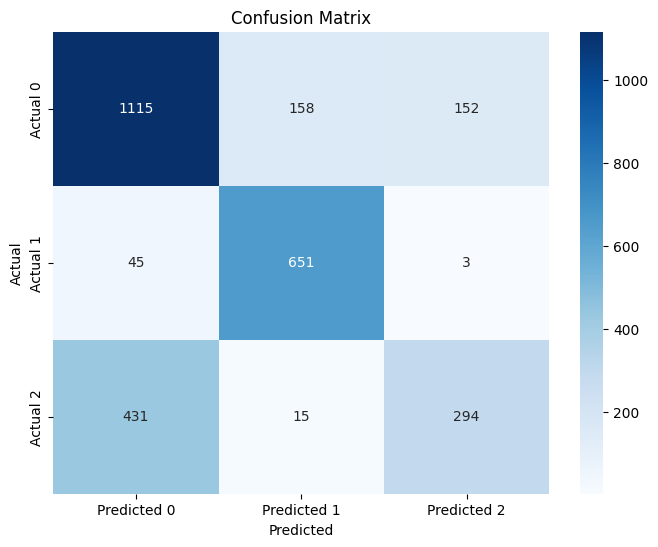

Cross-Validation Accuracy: 0.7115
Training Accuracy: 0.7224


In [52]:
y_pred_test = final_rf_model.predict(X_test)
generate_results(y_test, y_pred_test, best_rf_model, X_train_final, y_train_final)

- F1-Score: The model is good at detecting Domestic Ultimates (1), fairly good in detecting Neither (0) and has poor performance in detecting Global Ultimates (2), only able to detect them <50% of the time.
- The cross-validation accuracy (71.15%) is close to the test accuracy (71.93%), indicating that the model is consistently performing at this level.
- The training accuracy (72.24%) close to the test accuracy (71.93%), indicating that the model is well fit.
  
**Insights: One thing we hadn't accounted for was that ALL Global Ultimates are also Domestic Ultimates. It could be wiser from this point onwards to perform a 2-pronged prediction model. To predict `Is Domestic Ultimate` first and then from the predicted numbers, we will predict `Is Global Ultimate`.**

### **Two-Pronged Random Forest**

**Training Using the Training Set (Domestic Ultimate)**

In [53]:
# First model: Predict Domestic Ultimates
X_dom = champ_encoded[features]
y_dom = champ_encoded["Is Domestic Ultimate"]

# New Train-Validation-Testing Set for Domestic Ultimates
X_train_dom, X_temp_dom, y_train_dom, y_temp_dom = train_test_split(
    X_dom, y_dom, test_size=0.2, random_state=42, stratify=y_dom
)
X_val_dom, X_test_dom, y_val_dom, y_test_dom = train_test_split(
    X_temp_dom, y_temp_dom, test_size=0.5, random_state=42, stratify=y_temp_dom
)

rf_dom = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf_dom.fit(X_train_dom, y_train_dom)

RandomForestClassifier(class_weight='balanced', random_state=42)

**Tune Hyperparameters on the Training Set (Domestic Ultimate)**

In [54]:
# You may choose to run the randomised search to verify the parameters, but it will take a bit of time (change RUN_TUNING to True)
RUN_TUNING = False

if RUN_TUNING:
    param_dist = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    rf_dom = RandomForestClassifier(class_weight='balanced', random_state=42)

    random_search_dom = RandomizedSearchCV(
        rf_dom, param_distributions=param_dist_dom, 
        n_iter=20, cv=5, scoring='accuracy', random_state=42, n_jobs=-1
    )

    random_search_dom.fit(X_train_dom, y_train_dom)
    best_params_dom = random_search_dom.best_params_
    
    print("Best Parameters:", best_params_dom)
    print("Best Accuracy:", random_search_dom.best_score_)
else:
    best_params_dom = {
    'n_estimators': 200,
    'min_samples_split': 2,
    'min_samples_leaf': 4,
    'max_depth': 20
    }

best_rf_dom = RandomForestClassifier(**best_params_dom, random_state=42)
best_rf_dom.fit(X_train_dom, y_train_dom)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, n_estimators=200,
                       random_state=42)

**Validate Model Using Validation Set (Domestic Ultimate)**

In [55]:
y_pred_val_dom = best_rf_dom.predict(X_val_dom)
val_acc_dom = accuracy_score(y_val_dom, y_pred_val_dom)

print(f"Validation Accuracy (Domestic Ultimate): {val_acc_dom:.4f}")
print("Validation Classification Report:\n", classification_report(y_val_dom, y_pred_val_dom))

Validation Accuracy (Domestic Ultimate): 0.7192
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72      1424
           1       0.72      0.72      0.72      1439

    accuracy                           0.72      2863
   macro avg       0.72      0.72      0.72      2863
weighted avg       0.72      0.72      0.72      2863



**Retrain Model Using Training and Validation Set (Domestic Ultimate)**

In [56]:
X_train_final_dom = np.vstack((X_train_dom, X_val_dom))
y_train_final_dom = np.hstack((y_train_dom, y_val_dom))

best_rf_dom = RandomForestClassifier(**best_params_dom, random_state=42)
best_rf_dom.fit(X_train_final_dom, y_train_final_dom)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, n_estimators=200,
                       random_state=42)

**Predict Using the Test Set (Domestic Ultimate)**

In [57]:
y_pred_test_dom = best_rf_dom.predict(X_test_dom)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


**Training Using the Training Set (Global Ultimate)**

In [58]:
champ_global = champ_encoded[champ_encoded["Is Domestic Ultimate"] == 1].copy()
# Store probability of being a Domestic Ultimate for Global Ultimate model to take into account uncertainty
champ_global["predicted_domestic"] = best_rf_dom.predict_proba(champ_global[features])[:, 1]

# Second model: Predict Global Ultimates
X_glob = champ_global[features + ["predicted_domestic"]]
y_glob = champ_global["Is Global Ultimate"]

# New Train-Validation-Testing Set for Global Ultimates
X_train_glob, X_temp_glob, y_train_glob, y_temp_glob = train_test_split(
    X_glob, y_glob, test_size=0.2, random_state=42, stratify=y_glob
)
X_val_glob, X_test_glob, y_val_glob, y_test_glob = train_test_split(
    X_temp_glob, y_temp_glob, test_size=0.5, random_state=42, stratify=y_temp_glob
)

rf_glob = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf_glob.fit(X_train_glob, y_train_glob)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


RandomForestClassifier(class_weight='balanced', random_state=42)

**Tune Hyperparameters on the Training Set (Global Ultimate)**

In [59]:
# You may choose to run the randomised search to verify the parameters, but it will take a bit of time (change RUN_TUNING to True)
RUN_TUNING = False

if RUN_TUNING:

    param_dist_glob = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    rf_glob = RandomForestClassifier(class_weight='balanced', random_state=42)
    
    random_search_glob = RandomizedSearchCV(
        rf_glob, param_distributions=param_dist_glob, 
        n_iter=20, cv=5, scoring='accuracy', random_state=42, n_jobs=-1
    )
    
    random_search_glob.fit(X_train_glob, y_train_glob)
    best_params_glob = random_search_glob.best_params_
    
    print("Best Parameters for Global Ultimate Model:", best_params_glob)
    print("Best Accuracy:", random_search_glob.best_score_)
else:
    best_params_glob = {
    'n_estimators': 100,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'max_depth': 10
    }

best_rf_glob = RandomForestClassifier(**best_params_glob, random_state=42)
best_rf_glob.fit(X_train_glob, y_train_glob)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

**Validate Model Using Validation Set (Global Ultimate)**

In [60]:
y_pred_val_glob = best_rf_glob.predict(X_val_glob)
val_acc_glob = accuracy_score(y_val_glob, y_pred_val_glob)

print(f"Validation Accuracy (Global Ultimate): {val_acc_glob:.4f}")
print("Validation Classification Report:\n", classification_report(y_val_glob, y_pred_val_glob))

Validation Accuracy (Global Ultimate): 0.9771
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       699
           1       0.98      0.97      0.98       740

    accuracy                           0.98      1439
   macro avg       0.98      0.98      0.98      1439
weighted avg       0.98      0.98      0.98      1439



**Retrain Model Using Training and Validation Set (Global Ultimate)**

In [61]:
X_train_final_glob = np.vstack((X_train_glob, X_val_glob))
y_train_final_glob = np.hstack((y_train_glob, y_val_glob))

best_rf_glob = RandomForestClassifier(**best_params_glob, random_state=42)
best_rf_glob.fit(X_train_final_glob, y_train_final_glob)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

**Predict Using the Test Set (Global Ultimate)**

In [62]:
y_pred_test_glob = best_rf_glob.predict(X_test_glob)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


### **Results of the 2-pronged Random Forest Model**

We will also define a new model evaluator - **pooled accuracy.**

Since both models (Domestic Ultimate & Global Ultimate) have different numbers of test samples, we need to weight the accuracies based on the number of samples to get a pooled accuracy score.

In [63]:
def generate_pooled_accuracy(y_test_dom, y_pred_dom, y_test_glob, y_pred_glob):
    accuracy_dom = accuracy_score(y_test_dom, y_pred_dom)
    accuracy_glob = accuracy_score(y_test_glob, y_pred_glob)

    # Get the number of samples in each test set
    n_dom = len(y_test_dom)
    n_glob = len(y_test_glob)
    total_samples = n_dom + n_glob
    
    # Compute the pooled accuracy (weighted by sample size)
    pooled_accuracy = ((accuracy_dom * n_dom) + (accuracy_glob * n_glob)) / total_samples
    
    print(f"\nPooled Accuracy: {pooled_accuracy:.4f}")

Domestic Ultimate Model Evaluation:
Accuracy: 0.7241620111731844
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.73      1425
           1       0.73      0.71      0.72      1439

    accuracy                           0.72      2864
   macro avg       0.72      0.72      0.72      2864
weighted avg       0.72      0.72      0.72      2864



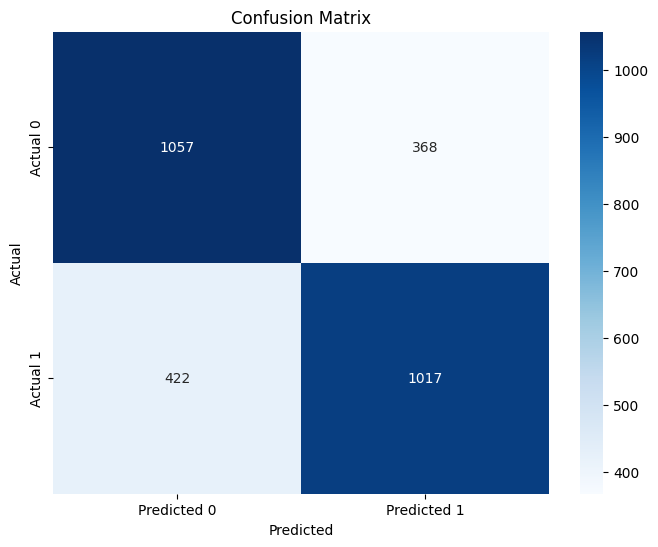

Cross-Validation Accuracy: 0.7213


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Training Accuracy: 0.7570

Global Ultimate Model Evaluation:
Accuracy: 0.9791521890201529
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       700
           1       0.98      0.98      0.98       739

    accuracy                           0.98      1439
   macro avg       0.98      0.98      0.98      1439
weighted avg       0.98      0.98      0.98      1439



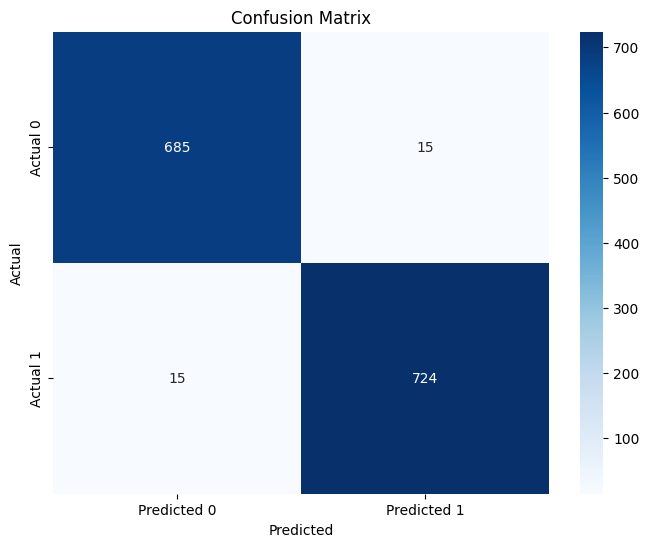

Cross-Validation Accuracy: 0.9729
Training Accuracy: 0.9800

Pooled Accuracy: 0.8094


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [64]:
print("Domestic Ultimate Model Evaluation:")
generate_results(y_test_dom, y_pred_test_dom, best_rf_dom, X_train_dom, y_train_dom)

print("\nGlobal Ultimate Model Evaluation:")
generate_results(y_test_glob, y_pred_test_glob, best_rf_glob, X_train_glob, y_train_glob)

generate_pooled_accuracy(y_test_dom, y_pred_test_dom, y_test_glob, y_pred_test_glob)

Results:
- Now, the test accuracy of the Domestic Model is 72.42%. The test accuracy of the Global Ultimate Model has risen up to 97.92%%. They both have a **pooled accuracy score of 80.94%**.
- Both models do not indicate overfitting as the training accuracies and test accuracies are similar.

## **6.3 XGBoost**

[0]	train-mlogloss:1.05850	val-mlogloss:1.05939
[10]	train-mlogloss:0.76133	val-mlogloss:0.76473
[20]	train-mlogloss:0.66896	val-mlogloss:0.67665
[30]	train-mlogloss:0.62072	val-mlogloss:0.63142
[40]	train-mlogloss:0.59267	val-mlogloss:0.60758
[50]	train-mlogloss:0.57508	val-mlogloss:0.59357
[60]	train-mlogloss:0.56397	val-mlogloss:0.58692
[70]	train-mlogloss:0.55519	val-mlogloss:0.58214
[80]	train-mlogloss:0.54918	val-mlogloss:0.58046
[90]	train-mlogloss:0.54393	val-mlogloss:0.57927
[100]	train-mlogloss:0.53938	val-mlogloss:0.57829
[110]	train-mlogloss:0.53548	val-mlogloss:0.57823
[120]	train-mlogloss:0.53140	val-mlogloss:0.57743
[130]	train-mlogloss:0.52777	val-mlogloss:0.57724
[140]	train-mlogloss:0.52422	val-mlogloss:0.57734
[150]	train-mlogloss:0.52112	val-mlogloss:0.57795
[160]	train-mlogloss:0.51807	val-mlogloss:0.57847
[170]	train-mlogloss:0.51518	val-mlogloss:0.57850
[180]	train-mlogloss:0.51235	val-mlogloss:0.57859
Best CV score: 0.5969 with 65 rounds

Classification Report:


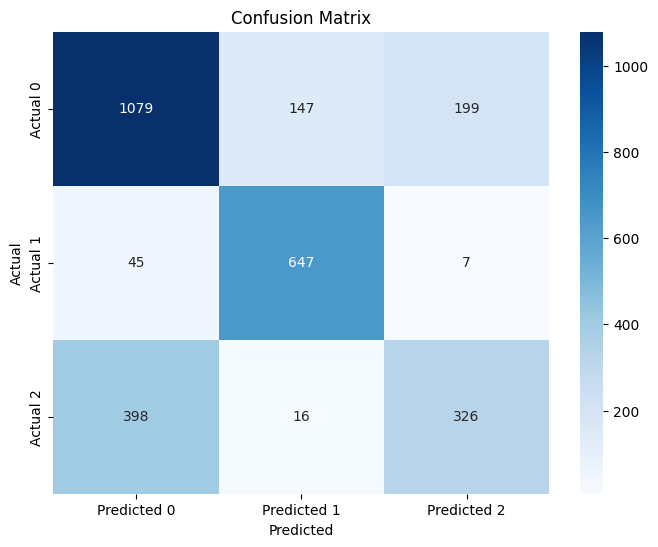

In [65]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'multi:softmax', 
    'num_class': 3,               
    'eval_metric': 'mlogloss',    
    'eta': 0.1,               
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

evals = [(dtrain, 'train'), (dval, 'val')]
model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=50,
    verbose_eval=10
)

cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=1000,
    nfold=5,
    metrics={'mlogloss', 'merror'},
    early_stopping_rounds=50,
    seed=42
)

print("Best CV score: {:.4f} with {} rounds".format(
    cv_results['test-mlogloss-mean'].min(),
    cv_results['test-mlogloss-mean'].argmin())
)

y_pred = model.predict(dtest)
y_pred_train = model.predict(dtrain)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nTest Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))
print("Train Accuracy: {:.4f}".format(accuracy_score(y_train, y_pred_train)))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)

num_classes = cm.shape[0]

class_labels_pred = [f'Predicted {i}' for i in range(num_classes)]
class_labels_true = [f'Actual {i}' for i in range(num_classes)]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels_pred, yticklabels=class_labels_true)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

The results are similar to the one-pronged approach of Random Forest as such, **we will not be performing a two-pronged approach of XGBoost**:
- XGBoost natively supports multi-class classfication, meaning it can learn direct distinctions between Domestic Ultimate, Global Ultimate, and Neither in a single model.
- The Random Forest one-pronged approach already showed comparable results to XGBoost. If XGBoost does not significantly outperform Random Forest in a single-step approach, it is unlikely that a more complex two-pronged XGBoost model will add value.

## **6.4 K-Nearest Neighbors**

In [66]:
param_dist = {
    'n_neighbors': np.arange(1, 21, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()

randomized_search = RandomizedSearchCV(
    knn, param_dist, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42, verbose=1
)

randomized_search.fit(X_train, y_train)

best_params = randomized_search.best_params_
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)

y_pred = best_knn.predict(X_test)
print("Test Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Test Accuracy: 0.6023


The k-nearest neighbors algorithm shows the worst accuracies than the other classifiers at only 60.23%.

# **7. Final Results and Insights**

The model with the best performance in predicting whether the `Is Domestic Ultimate` and `Is Global Ultimate` classifications is the two-pronged Random Forest model. Using the pooled accuracy formula, we see that it has achieved a **80.94% accuracy for the test set**.

**Insights:**
- Predicting Domestic Ultimates first helps refine predictions for Global Ultimates.
- This suggests that Domestic Ultimates have clearer features (e.g. regional presence, specific keywords). Global Ultimates may overlap more with other categories, making them harder to classify.

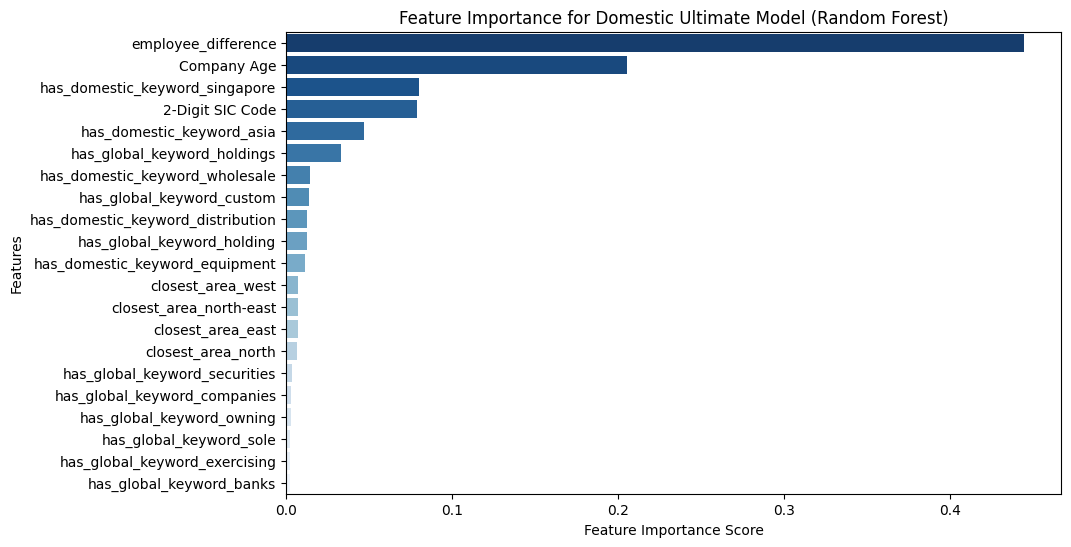

In [67]:
feature_importances = best_rf_dom.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train_dom.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="Blues_r", hue='Feature')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Domestic Ultimate Model (Random Forest)")
plt.show()

The features in the first model that are useful to predict whether a company is a Domestic Ultimate and Global Ultimate are `employee_difference`, `Company Age`, `has_domestic_keyword_singapore` and `2-Digit SIC Code`.

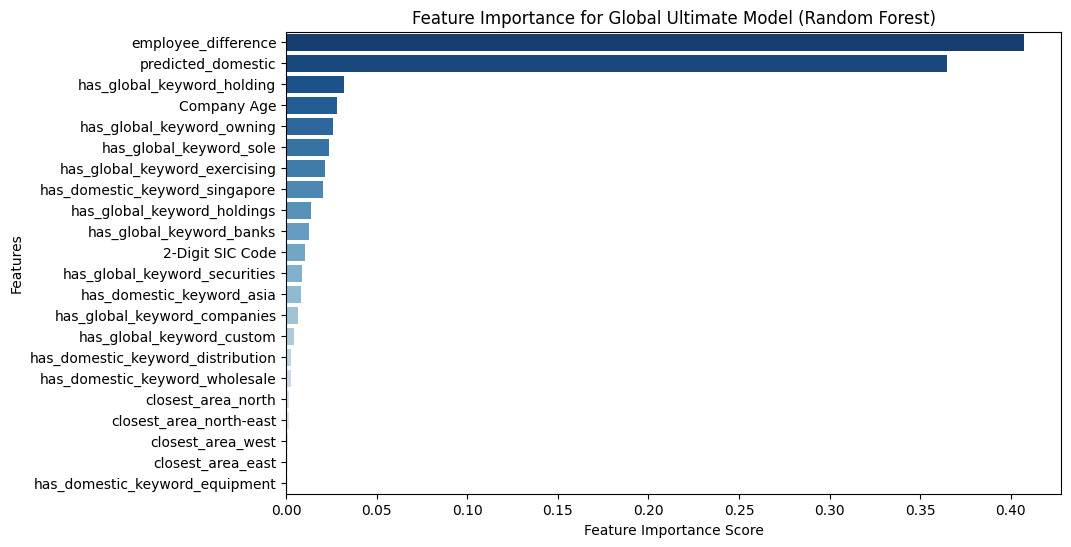

In [68]:
feature_importances = best_rf_glob.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train_glob.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="Blues_r", hue='Feature')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Global Ultimate Model (Random Forest)")
plt.show()

The features in the second model that are useful to predict whether a company is a Global Ultimate are `employee_difference`, `predicted_domestic`, `has_domestic_keyword_holding` and `Company Age`.

For future models, it could be better to find more distinctive features that would differentiate a Domestic Ultimate and Global Ultimate. Currently the features to predict both are more or less similar.